In [51]:
ord('С')%5

2

In [2]:
from sklearn import neighbors as ne, metrics as me, cluster as cl, datasets as ds, preprocessing as pr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from warnings import filterwarnings as fw
fw('ignore')

In [18]:
def getsil(x,ypred):
    cluster_labels = np.unique(ypred)
    n_clusters  = cluster_labels.shape[0]
    silhouette_values = me.silhouette_samples(x,ypred)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for c in cluster_labels:
        c_silhouette_values = silhouette_values[ypred == c]
        c_silhouette_values.sort()
        y_ax_upper += len(c_silhouette_values)
        color = ['r','g','b',"orange", "lightgreen", "lightblue"][c]  
        plt.barh(range(y_ax_lower, y_ax_upper), 
                c_silhouette_values, 
                height = 1.0, 
                edgecolor='none', color = color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_values)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'k', linestyle = '--')
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Кластер')
    plt.xlabel('Коэффициент силуэта')
    plt.tight_layout()
    plt.show()

# Кластерный анализ

## Сравнение работы алгоритмов кластеризации на синтетических наборах данных

#### Blobs

Визуализируем объекты с исходными метками:

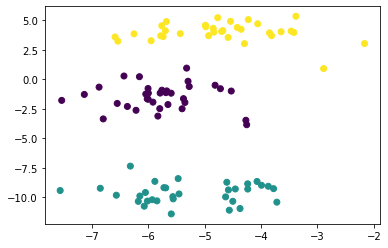

In [4]:
x,y = ds.make_blobs()
plt.scatter(x=x[:,0], y=x[:,1], c=y)

Кластеризуем с помощью KMeans

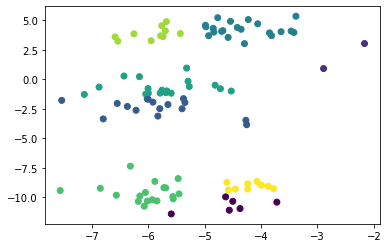

In [5]:
ypred = cl.KMeans().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

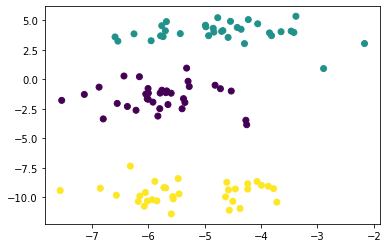

In [6]:
ypred = cl.KMeans(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

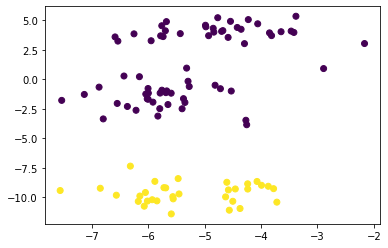

In [7]:
ypred = cl.AgglomerativeClustering().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

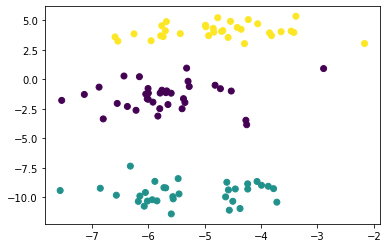

In [8]:
ypred = cl.AgglomerativeClustering(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

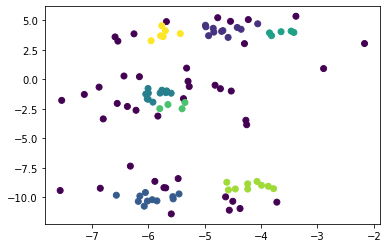

In [9]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

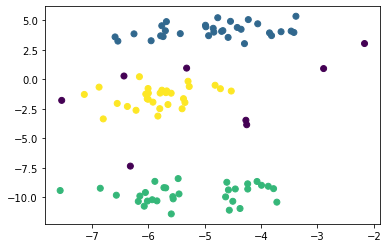

In [10]:
ypred = cl.DBSCAN(eps=1, min_samples=5).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

#### Moons

Визуализируем объекты с исходными метками:

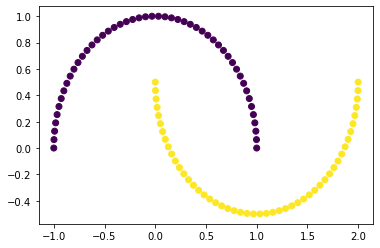

In [11]:
x,y = data = ds.make_moons()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans

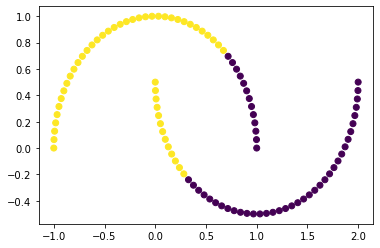

In [12]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

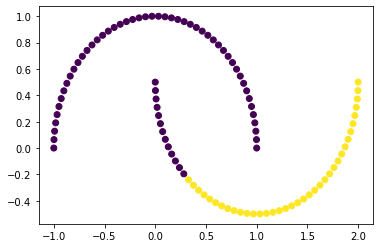

In [13]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

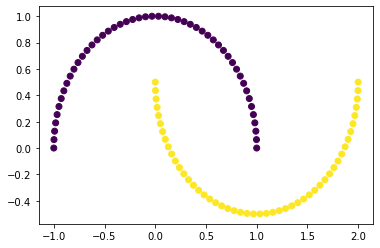

In [14]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

#### Circles

Визуализируем объекты с исходными метками:

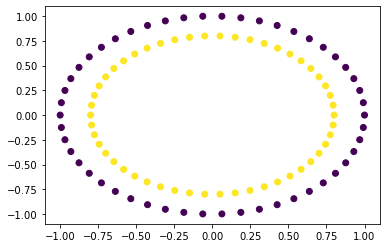

In [15]:
x,y = data = ds.make_circles()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans

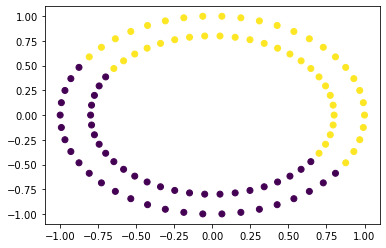

In [16]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

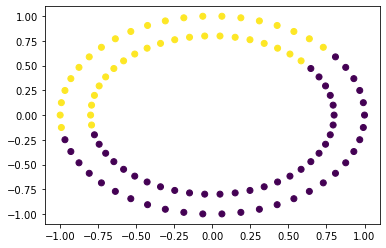

In [17]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

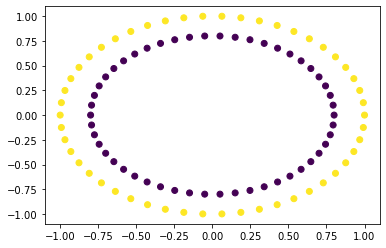

In [18]:
clust = cl.DBSCAN(eps=0.18, min_samples=3)
ypred = clust.fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

## Кластеризация выбранного набора данных

Закодируем метки классов в цифровой вид и отделим в целевой параметр

In [16]:
data = pd.read_csv('bus.csv',sep=' ',index_col=False)
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]
LE = pr.LabelEncoder()
y = LE.fit_transform(y)
data.shape

(846, 19)

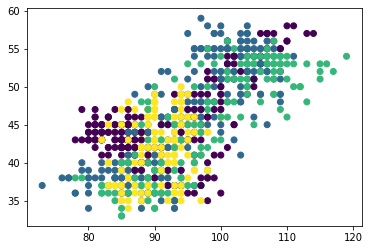

In [27]:
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y)

Рассмотрим различное количество кластеров и оценку силуэтов для каждого

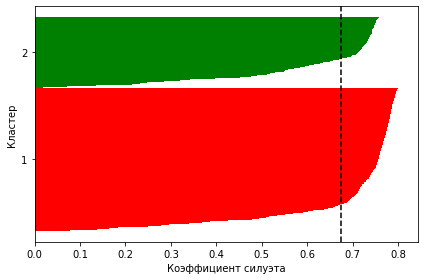

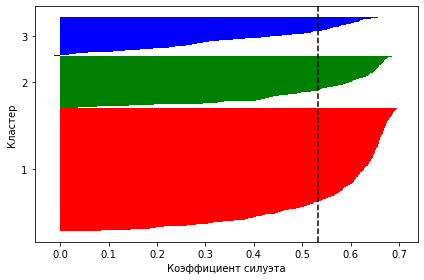

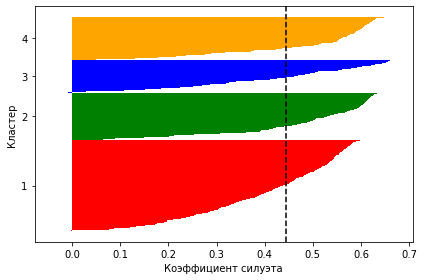

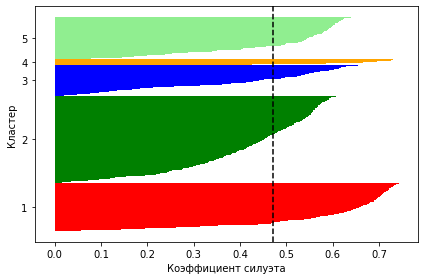

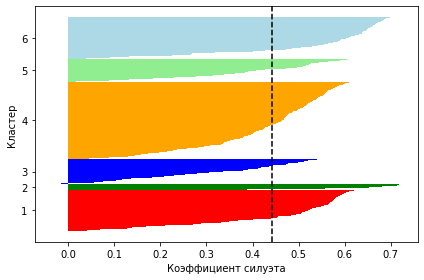

In [19]:
for i in range(2,7):
    cluster = cl.KMeans(n_clusters=i)
    ypred = cluster.fit_predict(x)
    getsil(x,ypred)

Возьмем 4 в качестве числа кластеров, в таком случае оно совпадет с количеством классов, а сами кластеры будут схожи по размеру

Кластеризуем с помощью KMeans

rand score = 0.6523339907955292
clusters = {0: 168, 1: 188, 2: 359, 3: 131}


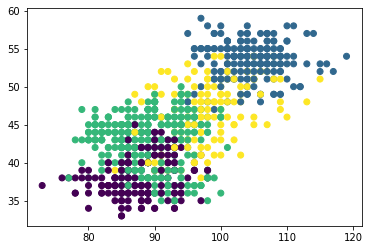

In [24]:
cluster = cl.KMeans(n_clusters=4)
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y,ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=ypred)

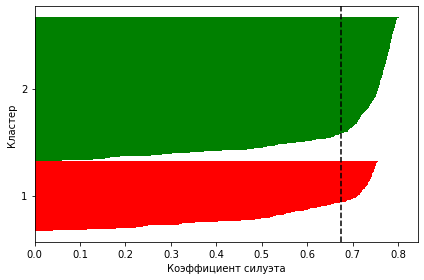

In [22]:
getsil(x,ypred)

Кластеризуем с помощью AgglomerativeClustering

rand score = 0.6408857554520402
clusters = {0: 169, 1: 384, 2: 142, 3: 151}


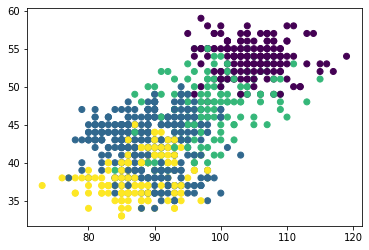

In [28]:
cluster = cl.AgglomerativeClustering(n_clusters=4)
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y,ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=ypred)

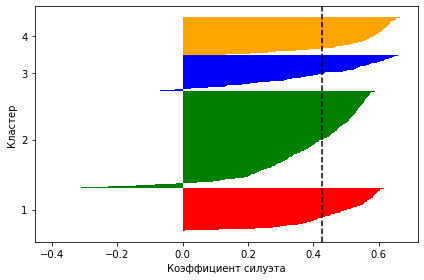

In [29]:
getsil(x,ypred)

Кластеризуем с помощью DBSCAN

Приблизим параметр epsilon, вычислив расстояния с помощью ближайших соседей, min_samples как 2*кол-во параметров.

In [173]:
cluster = cl.DBSCAN()
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y,ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))

rand score = 0.2494327639990488
clusters = {-1: 846}


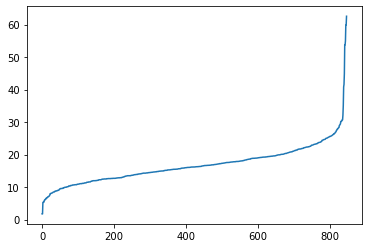

In [174]:
neighbors = ne.NearestNeighbors(n_neighbors=38)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [176]:
cluster = cl.DBSCAN(eps=25,min_samples=38)
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y,ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))

rand score = 0.3988641291423615
clusters = {-1: 722, 0: 86, 1: 38}


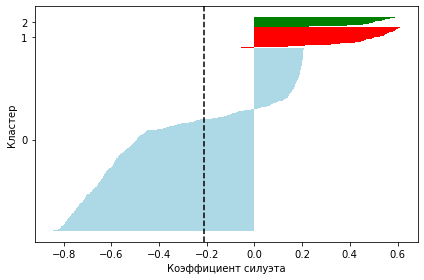

In [177]:
getsil(x,ypred)

In [178]:
cluster = cl.DBSCAN(eps=0.0015,min_samples=75,metric='cosine')
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y,ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))

rand score = 0.6238365017415753
clusters = {-1: 296, 0: 311, 1: 239}


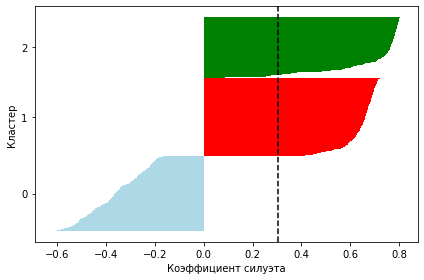

In [179]:
getsil(x,ypred)

In [167]:
tmax = 0
for i in range(5,35,1):
    for j in [1, 2, 5, 10, 25, 50, 100]:
        cluster = cl.DBSCAN(eps=i,min_samples=j, n_jobs=-1)
        ypred = cluster.fit_predict(x)
        if(me.cluster.rand_score(y,ypred) > tmax):
            tmax = me.cluster.rand_score(y,ypred)
            ti = i
            tj = j
print('best rand={0} with eps={1} and min_samples={2}'.format(tmax,ti,tj))

best rand=0.762686922097724 with eps=18 and min_samples=1


In [180]:
cluster = cl.DBSCAN(eps=ti,min_samples=tj, n_jobs=-1)
ypred = cluster.fit_predict(x)
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))

clusters = {0: 1, 1: 67, 2: 2, 3: 132, 4: 1, 5: 2, 6: 1, 7: 15, 8: 2, 9: 2, 10: 11, 11: 1, 12: 1, 13: 1, 14: 19, 15: 2, 16: 34, 17: 1, 18: 10, 19: 1, 20: 1, 21: 1, 22: 2, 23: 2, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 4, 31: 2, 32: 4, 33: 9, 34: 1, 35: 1, 36: 2, 37: 4, 38: 4, 39: 2, 40: 1, 41: 1, 42: 12, 43: 2, 44: 1, 45: 1, 46: 4, 47: 1, 48: 3, 49: 7, 50: 1, 51: 1, 52: 1, 53: 2, 54: 4, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 2, 65: 1, 66: 1, 67: 2, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 2, 77: 1, 78: 2, 79: 1, 80: 1, 81: 1, 82: 1, 83: 3, 84: 1, 85: 3, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 2, 99: 1, 100: 2, 101: 1, 102: 1, 103: 2, 104: 2, 105: 2, 106: 2, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 2, 113: 1, 114: 1, 115: 5, 116: 2, 117: 1, 118: 2, 119: 1, 120: 1, 121: 3, 122: 1, 123: 4, 124: 1, 125: 5, 126: 1, 127: 1, 128: 1, 129: 7, 130: 1, 131: 1, 132: 1, 133: 1, 134: 2, 135: 3, 1